In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm

In [2]:
def radius(A): # consistently fastest
    return np.max(np.abs(np.linalg.eigvals(A)))

example taken from https://www.jmlr.org/papers/volume13/hyttinen12a/hyttinen12a.pdf

In [3]:
A = np.array([[0,0.9,0],[-0.7,0,0.8],[-0.8,0,0]])

radius(A)

0.9886047987633151

In [4]:
radius(np.abs(A))

1.0788441631945838

In [5]:
A = np.array([[0,0.9,0],[-0.7,0,0.8],[-0.8,0,0]])
print(A)
radius(A)

[[ 0.   0.9  0. ]
 [-0.7  0.   0.8]
 [-0.8  0.   0. ]]


0.9886047987633151

In [6]:
A = np.array([[1,.1],[-.1,-.1]])
print(A)
print(np.linalg.eigvals(A))
print(radius(A))
print(radius(np.abs(A)))

[[ 1.   0.1]
 [-0.1 -0.1]]
[ 0.99083269 -0.09083269]
0.9908326913195985
1.0109772228646445


example A.8 from Foundations supplemental.

In [7]:
c = .99
A = np.array([[0,0,0,0],[0,0,0,0],[c,0,0,c],[0,c,c,0]])

radius(A)

0.99

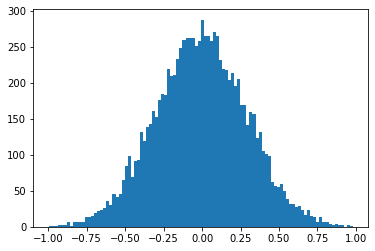

In [8]:
# user input
myclip_a = -1
myclip_b = 1
my_mean = 0.
my_std = 0.3

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
X = np.linspace(-1,1,1000)
# pdf = truncnorm.pdf(X, a, b, loc = my_mean, scale = my_std)
Y = truncnorm.rvs(a, b, loc = my_mean, scale = my_std, size=10000)
assert np.all(Y>-1)
assert np.all(Y<1)
plt.hist(Y,bins=100)
plt.show()

In [9]:
def uni_trunc_normal(lower,upper,mean,std,n):
    "lower and upper truncated bounds, mean, std, n=num_points"
    a, b = (lower - mean) / std, (upper - mean) / std
    X = np.linspace(lower,upper,1000)
    Y = truncnorm.rvs(a, b, loc = mean, scale = std, size=n)
    assert np.all(Y>-1)
    assert np.all(Y<1)
    return np.array(Y)

In [10]:
n = 100
E = np.vstack([uni_trunc_normal(-1,1,0,0.3,n) for i in range(4)]).T
E.shape

(10000, 4)

In [15]:
def F(e, epsilon=1e-5):
    if np.product(e[:2]) < epsilon:
        return e
    else:
        x3 = (e[0]*e[3]+e[2])/(1-e[0]*e[1])
        x4 = x3*e[1] + e[3]
        return [e[0],e[1],x3,x4]
V = np.apply_along_axis(F, 1, E)
V.shape

(10000, 4)

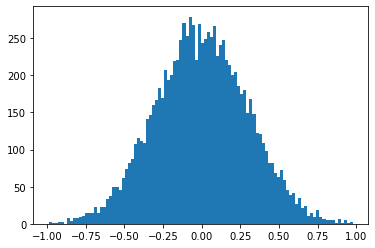

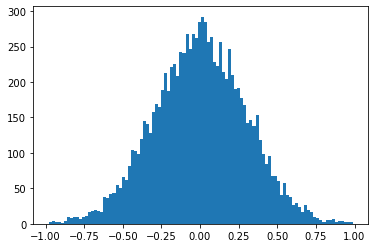

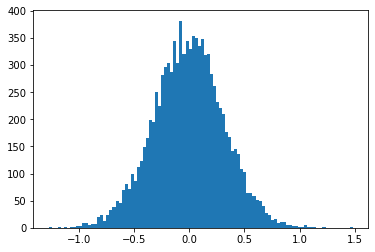

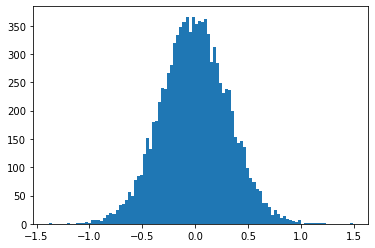

In [16]:
for i in range(4):
    plt.hist(V[:,i],bins=100)
    plt.show()

In [ ]:
lhs = np.mean(V)

In [ ]:
def conditional_probs(data,I,J):
    """Compute P(data_I | data_J)
    I and J are tuples of variable indices
    data is shape (num_samples, num_variables)
    """
    
    
    given_mask = np.ones(len(data),dtype=bool)
    for col in givens:
        given_mask = np.logical_and(given_mask,data[col])
    data[given_mask]
    
    primary_mask = np.ones(len(data[given_mask]),dtype=bool)
    for col in primaries:
        primary_mask = np.logical_and(primary_mask,data[given_mask][col])
    
    return np.mean(primary_mask)

In [17]:
import numpy as np
from fcit import fcit

x = np.random.rand(1000, 1)
y = np.random.randn(1000, 1)

pval_i = fcit.test(x, y) # p-value should be uniform on [0, 1].
pval_d = fcit.test(x, x + y) # p-value should be very small.

In [18]:
print(pval_i)
print(pval_d)

0.73536290011725
0.008192571726836819


In [20]:
# Generate some data such that x is indpendent of y given z.
n_samples = 1000
z = np.random.dirichlet(alpha=np.ones(2), size=n_samples)
x = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)
y = np.vstack([np.random.multinomial(20, p) for p in z]).astype(float)

# Check that x and y are dependent (p-value should be uniform on [0, 1]).
pval_d = fcit.test(x, y)
print(pval_d)
# Check that z d-separates x and y (the p-value should be small).
pval_i = fcit.test(x, y, z)
print(pval_i)

1.2312517534714203e-05
0.5


In [21]:
x.shape

(1000, 2)

In [22]:
y.shape

(1000, 2)